In [43]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name: Viraj Patil
- PRN : 230940128038


# Deep Neural Networks

## Assignment 5
### Neural Network with :
- One hidden layer 
- ${Tanh}$ activation function
- **multi-class**

In [44]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections.abc import Callable
from typing import Literal

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#changes------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
#changes------------------------------

%matplotlib inline

In [45]:
###----------------
### Some parameters
###----------------

inpDir = '../DNN/7. DNN/input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 3001 # number of epochs
ALPHA = 0.01 # learning rate
NUM_SAMPLES = 1280 # How many samples we want to generate 
NOISE = 0.2 # Noise to be introduced in the data
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

## Generate Data Set

FIFA 2019 Dataset

In [46]:
data_df = pd.read_csv('fifa_2019.csv')

In [47]:
for col in data_df.columns:
    print(f'{col} : {data_df[col].unique()}')

Unnamed: 0 : [    0     1     2 ... 18204 18205 18206]
ID : [158023  20801 190871 ... 241638 246268 246269]
Name : ['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']
Age : [31 33 26 27 32 25 29 28 24 30 19 40 22 23 34 35 36 37 21 18 20 39 41 17
 38 45 42 16 44]
Photo : ['https://cdn.sofifa.org/players/4/19/158023.png'
 'https://cdn.sofifa.org/players/4/19/20801.png'
 'https://cdn.sofifa.org/players/4/19/190871.png' ...
 'https://cdn.sofifa.org/players/4/19/241638.png'
 'https://cdn.sofifa.org/players/4/19/246268.png'
 'https://cdn.sofifa.org/players/4/19/246269.png']
Nationality : ['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Montenegro' 'Armenia' '

In [48]:
data_df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [49]:
data_df = data_df[data_df['Position'].notnull()]
data_df.shape

(18147, 89)

In [50]:
data_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [51]:
rel_columns = ['Position','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

"""['Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
        'Release Clause']"""

"['Name', 'Age', 'Photo', 'Nationality', 'Flag',\n       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',\n       'Preferred Foot', 'International Reputation', 'Weak Foot',\n       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',\n       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',\n       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',\n       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',\n       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',\n        'Release Clause']"

In [52]:
data_df = data_df[rel_columns]
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,ST,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,LW,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,GK,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,RCM,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [53]:
data_df.isna().sum()

Position           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

In [54]:
data_df.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [55]:
goalkeeper = 'GK'

forward = [ 'ST', 'LW', 'RW', 'LF', 'RF','RS', 'LS', 'CF', ]

midfilder = ['CM', 'RCM', 'LCM', 'CDM', 'RDM', 'LDM', 'CAM', 'LAM', 'RAM', 'RM', 'LM']

defence = ['CB', 'RCB', 'LCB', 'LWB', 'RWB', 'LB', 'RB']

In [56]:
data_df.loc[data_df['Position'] == 'GK',         'Position'] = 0

data_df.loc[data_df['Position'].isin(defence),   'Position'] = 1

data_df.loc[data_df['Position'].isin(midfilder), 'Position'] = 2

data_df.loc[data_df['Position'].isin(forward),   'Position'] = 3

data_df['Position'] = pd.to_numeric(data_df['Position'], downcast='integer')

In [57]:
data_df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,3,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,3,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,2,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [58]:
data_df['Position'].unique()

array([3, 0, 2, 1], dtype=int8)

In [59]:
labels = {0 : 'Goal Keepers', 1 : 'Defence', 2 : 'Mid-fielders', 3 : 'Forward'}

In [60]:
features_df = data_df.drop('Position', axis =1)
label_df = data_df['Position']
features_df.shape, label_df.shape

((18147, 33), (18147,))

In [61]:
label_df = pd.get_dummies(label_df)
label_df.shape

(18147, 4)

In [62]:
label_df.head()

,0,1,2,3
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,True,False,False,False
4,False,False,True,False


In [63]:
#  Split the data in training and test sets to measure performance of the model.
X_train, X_test, y_train, y_test = train_test_split(features_df, label_df,stratify=label_df, test_size=TEST_SIZE, random_state=RANDOM_STATE )

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14517, 33) (14517, 4) (3630, 33) (3630, 4)


In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [65]:
y_train

array([[False,  True, False, False],
       [False, False,  True, False],
       [False,  True, False, False],
       ...,
       [False, False,  True, False],
       [False, False, False,  True],
       [ True, False, False, False]])

In [66]:
torch.version.cuda

'12.1'

In [67]:
#torch.cuda.current_device()

In [68]:
#torch.cuda.get_device_name(torch.cuda.current_device())

In [69]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'

In [70]:
model = nn.Sequential(
    nn.Linear(33,18),
    nn.Tanh(),
    nn.Linear(18,10),
    nn.ReLU(),
    nn.Linear(10,4),
    nn.Softmax(dim=1)
).to(device)
print(model)

Sequential(
  (0): Linear(in_features=33, out_features=18, bias=True)
  (1): Tanh()
  (2): Linear(in_features=18, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=4, bias=True)
  (5): Softmax(dim=1)
)


In [71]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0603, -0.0090, -0.0996, -0.0427,  0.0040,  0.1678, -0.0933, -0.1702,
          -0.1718,  0.0917,  0.0797, -0.1006,  0.0806, -0.0980, -0.1680, -0.1669,
           0.0094,  0.0889, -0.0882, -0.0646,  0.1014,  0.0117, -0.0442,  0.0032,
           0.1514, -0.1213, -0.1311,  0.0795, -0.0341,  0.1093, -0.1467, -0.1500,
          -0.1683],
         [ 0.0347, -0.1228, -0.0819,  0.0708, -0.0956, -0.0918, -0.1348,  0.1029,
          -0.1172, -0.1614, -0.0578, -0.0454,  0.0488, -0.0254, -0.1476, -0.0828,
          -0.0731,  0.0091, -0.1280, -0.1410, -0.0068, -0.0927, -0.1272, -0.0679,
           0.0523, -0.1246,  0.0059,  0.1475, -0.0792, -0.1646, -0.1551, -0.1610,
           0.1631],
         [-0.1174,  0.1388, -0.0676, -0.0383,  0.0053, -0.1160,  0.1738, -0.1725,
           0.0637, -0.0556, -0.0570,  0.0926, -0.1308, -0.0393, -0.1658, -0.0155,
           0.0122,  0.0497,  0.0344,  0.1687,  0.0491,  0.1727,  0.0396, -0.1007,
           0.0552,  0.0628, -0.0096

In [72]:
print (f' Number of parameters {len(list(model.parameters()))}')

 Number of parameters 6


In [73]:
print (f' Layer 1 Weights {list(model.parameters())[0].shape}')
print (f' Layer 1 Bias    {list(model.parameters())[1].shape}')
print (f' Layer 2 Weights {list(model.parameters())[2].shape}')
print (f' Layer 2 Bias    {list(model.parameters())[3].shape}')

 Layer 1 Weights torch.Size([18, 33])
 Layer 1 Bias    torch.Size([18])
 Layer 2 Weights torch.Size([10, 18])
 Layer 2 Bias    torch.Size([10])


In [74]:
train_X = Variable(torch.Tensor(X_train).to(device))
train_y = Variable(torch.Tensor(y_train).to(device))
test_X = Variable(torch.Tensor(X_test).to(device))
test_y = Variable(torch.Tensor(y_test).to(device))

In [75]:
loss_fn = nn.CrossEntropyLoss()

loss = []
tloss = []
n_epoch = []
acc = []
tacc = []

optimizer = torch.optim.Adam(model.parameters() ,lr = ALPHA) #optimizer

#iteration

for epoch in range (EPOCHS):
    
    model.train()# Set the mode
    
    predict_prob = model(train_X)
    
    curr_loss = loss_fn(predict_prob, train_y)
    
    ##---------------------
    ### Back prop
    ##---------------------
    
    optimizer.zero_grad()
    curr_loss.backward()
    optimizer.step()
    ###-------------------
    
    loss.append( curr_loss.data.item() )
    
    _, y_pred = torch.max(predict_prob, 1)
    
    curr_acc = accuracy_score(y_train.argmax(axis = 1), y_pred.data.cpu())
    
    acc.append(curr_acc)
    
    model.eval()
    
    pred_prob_tst = model(test_X)
    
    tcurr_loss = loss_fn(pred_prob_tst, test_y)
    
    tloss.append(tcurr_loss.data.item())
    
    _, y_pred = torch.max(pred_prob_tst, 1)
    
    curr_acc_tst = accuracy_score(y_test.argmax(axis = 1), y_pred.data.cpu())
    
    tacc.append(curr_acc_tst)
    
    n_epoch.append(epoch)
    
    if epoch%100 == 0:
        print(f'epoch : {epoch} --- Loss {curr_loss.data.item():.3f}/{curr_loss.data.item():.3f}') #', en'
        print (f'--- Acc {curr_acc:.3f}')
    

epoch : 0 --- Loss 1.408/1.408
--- Acc 0.106
epoch : 100 --- Loss 0.864/0.864
--- Acc 0.880


epoch : 200 --- Loss 0.853/0.853
--- Acc 0.893
epoch : 300 --- Loss 0.845/0.845
--- Acc 0.903
epoch : 400 --- Loss 0.838/0.838
--- Acc 0.909
epoch : 500 --- Loss 0.833/0.833
--- Acc 0.915
epoch : 600 --- Loss 0.829/0.829
--- Acc 0.918
epoch : 700 --- Loss 0.827/0.827
--- Acc 0.919
epoch : 800 --- Loss 0.825/0.825
--- Acc 0.921
epoch : 900 --- Loss 0.824/0.824
--- Acc 0.921
epoch : 1000 --- Loss 0.824/0.824
--- Acc 0.921
epoch : 1100 --- Loss 0.823/0.823
--- Acc 0.921
epoch : 1200 --- Loss 0.823/0.823
--- Acc 0.922
epoch : 1300 --- Loss 0.822/0.822
--- Acc 0.922
epoch : 1400 --- Loss 0.822/0.822
--- Acc 0.922
epoch : 1500 --- Loss 0.822/0.822
--- Acc 0.922
epoch : 1600 --- Loss 0.822/0.822
--- Acc 0.922
epoch : 1700 --- Loss 0.822/0.822
--- Acc 0.922
epoch : 1800 --- Loss 0.822/0.822
--- Acc 0.922
epoch : 1900 --- Loss 0.822/0.822
--- Acc 0.922
epoch : 2000 --- Loss 0.822/0.822
--- Acc 0.922
epoch : 2100 --- Loss 0.822/0.822
--- Acc 0.922
epoch : 2200 --- Loss 0.822/0.822
--- Acc 0.922


In [76]:
loss_df = pd.DataFrame({'epoch' : n_epoch,
                        'loss' : loss,
                        'test_loss' : tloss,
                        'acc' : acc,
                        'test_acc': tacc
                        })

In [77]:
loss_df.head()

,epoch,loss,test_loss,acc,test_acc
0,0,1.407771,1.392679,0.106358,0.205785
1,1,1.392740,1.377212,0.198388,0.375482
2,2,1.377334,1.360945,0.371564,0.457851
3,3,1.361162,1.342588,0.456430,0.500826
4,4,1.342889,1.322124,0.502445,0.533609


In [78]:
loss_df[loss_df['test_loss'] == loss_df['test_loss'].min()]

,epoch,loss,test_loss,acc,test_acc
317,317,0.843495,0.857531,0.90425,0.882094


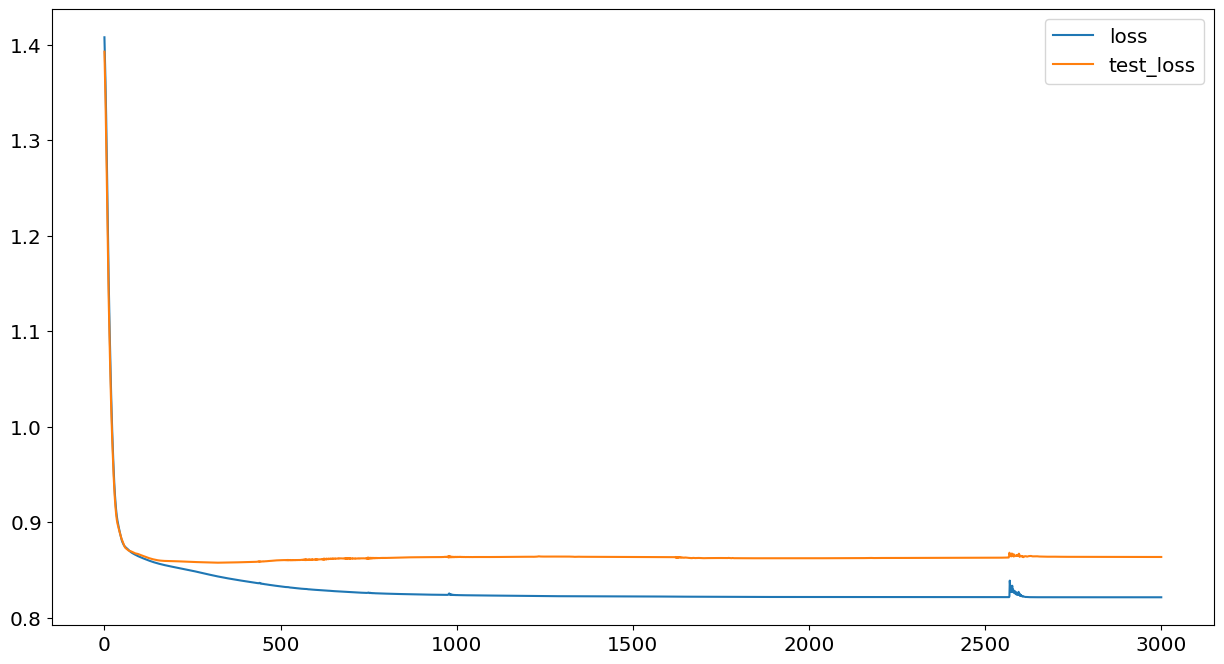

In [79]:
loss_df.plot(y = ['loss','test_loss']);

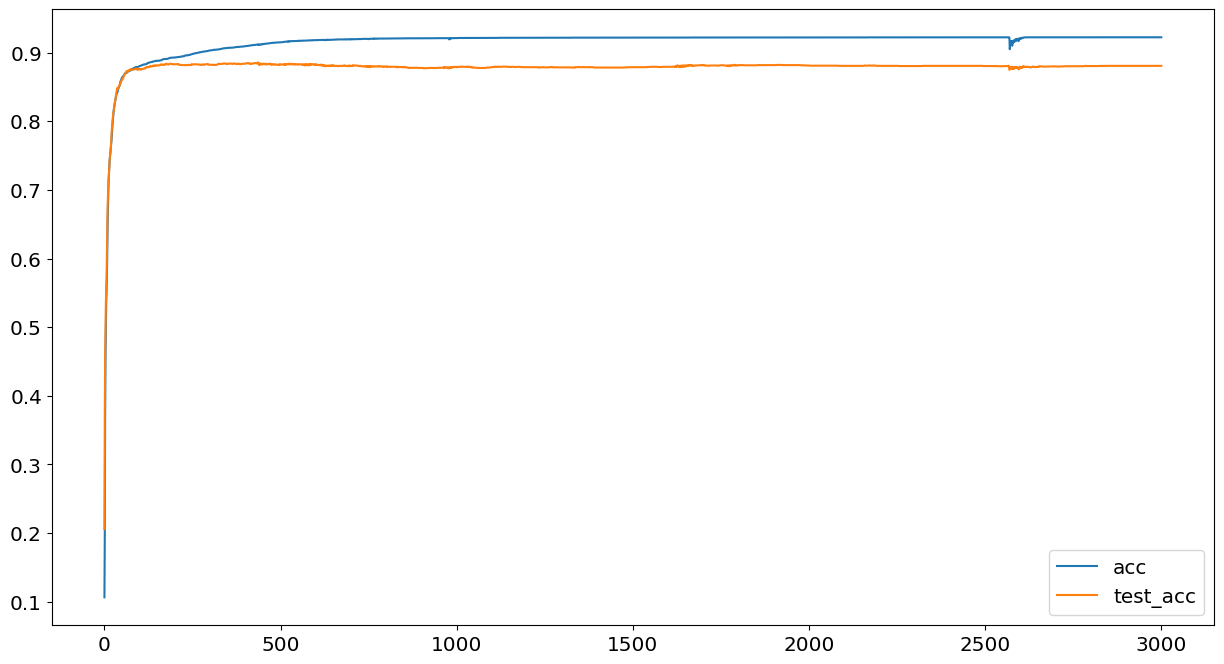

In [80]:
loss_df.plot(y = ['acc','test_acc']);

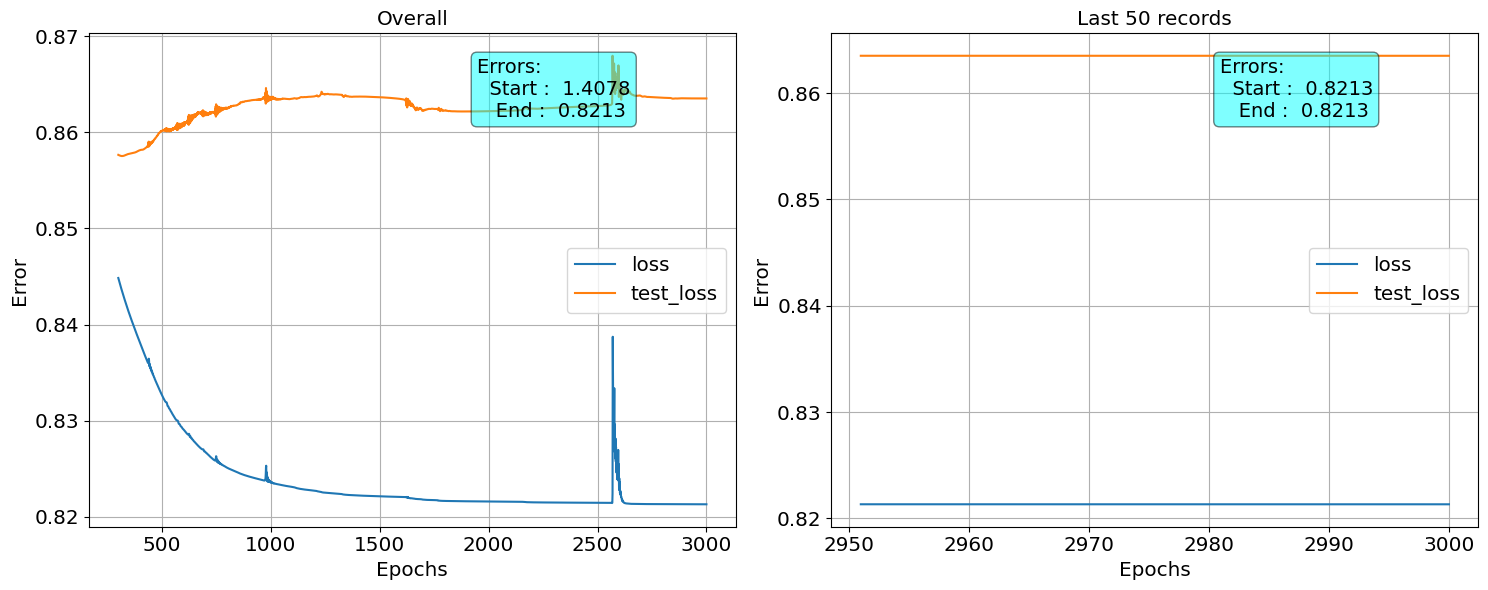

In [81]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

l_range = 50

ax = axes[0]

loss_df[300:].plot(x = 'epoch', y = ['loss', 'test_loss'], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Overall')
ax.grid();

ax = axes[1]

loss_df[-l_range:].plot(x = 'epoch', y = ['loss', 'test_loss'], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[-l_range]['loss'],
                                                                loss_df.iloc[-1]['loss']) #text to plot

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Last {} records'.format(l_range))
ax.grid();
plt.tight_layout()

In [82]:
loss_df[loss_df['test_loss'] == loss_df['test_loss'].min()]

,epoch,loss,test_loss,acc,test_acc
317,317,0.843495,0.857531,0.90425,0.882094


In [96]:
## Confusion Matrix helps

cm  = confusion_matrix(np.argmax(y_test, axis = 1), y_pred)
cm

array([[ 405,    0,    0,    0],
       [   0, 1094,   79,    0],
       [   0,   98, 1175,   95],
       [   0,    4,  157,  523]])

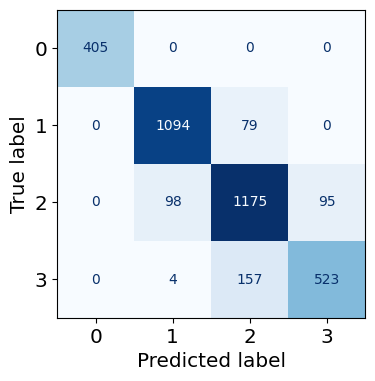

In [98]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', colorbar=False)

plt.show();